# KNN Test

Explorando **30 rodadas** de testes com **KNN** no _iris dataset_ e plotagens de gráficos

## Importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Carregando _dataset_ e gerando _DataFrame_

In [3]:
# Carregando dataset
irisDset = load_iris()

irisData = irisDset.data
irisTarget = irisDset.target

# Gerando DataFrame
irisDframe = pd.DataFrame(data=irisData, columns=irisDset.feature_names)

# Mostrando 5 amostras aleatórias
irisDframe.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
121,5.6,2.8,4.9,2.0
148,6.2,3.4,5.4,2.3
8,4.4,2.9,1.4,0.2
93,5.0,2.3,3.3,1.0
82,5.8,2.7,3.9,1.2


In [4]:
irisDframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
targetDframe = irisDframe.copy()
targetDframe['target'] = irisTarget
targetDescription = targetDframe.groupby('target').describe()
targetDescription

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

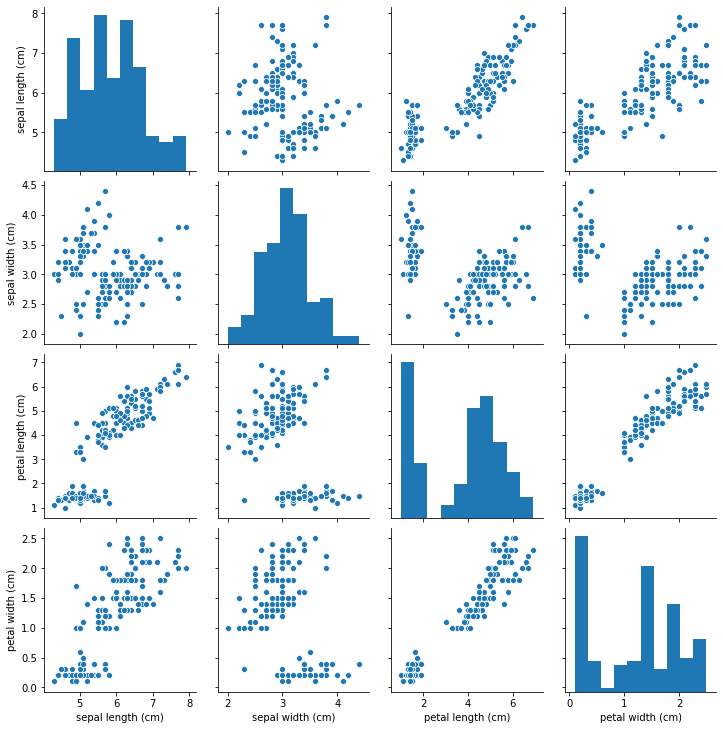

In [6]:
sns.pairplot(data=irisDframe)

## Explorando 30 rodadas com KNN

In [12]:
def test_30_knn():
    '''
    Executa 30 rodadas com KNN no dataset da iris
    '''

    # Armazena os resultados de acurácia e sensibilidade que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []
    usedSeed = []

    # Considerando que o número de vizinhos é a raiz do toral de amostras
    k_vizinhos = round(len(irisData) ** 0.5)

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(irisData, irisTarget, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=irisDset.target_names))

        print("Matriz de confusão normalizada")
        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize='true'))

        plot_confusion_matrix(classifier, X_test, y_test,
                                        display_labels=irisDset.target_names,
                                        cmap=plt.cm.Blues,
                                        normalize='true')
        plt.show()
    return irisAcc, irisRec, matrixProdada


- RODADA 0 - Semente 4699 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.    1.    0.875] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


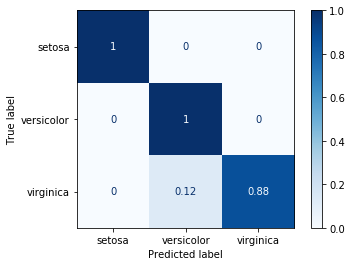


- RODADA 1 - Semente 5177 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


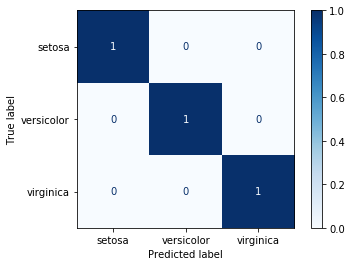


- RODADA 2 - Semente 5008 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.92307692] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


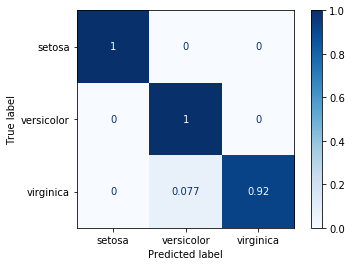


- RODADA 3 - Semente 7631 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.92857143] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


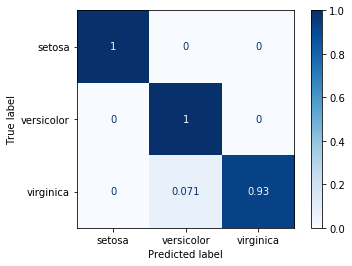


- RODADA 4 - Semente 1009 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


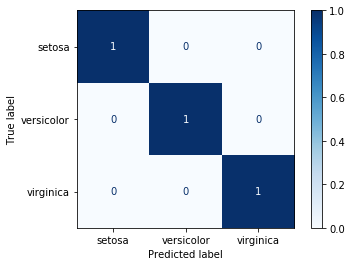


- RODADA 5 - Semente 6269 -

- Acurácia 0.8444444444444444 -
- Sensibilidade [1.         0.93333333 0.66666667] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.70      0.93      0.80        15
   virginica       0.92      0.67      0.77        18

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.86        45
weighted avg       0.87      0.84      0.84        45

Matriz de confusão normalizada


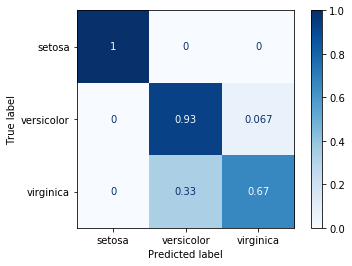


- RODADA 6 - Semente 54 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


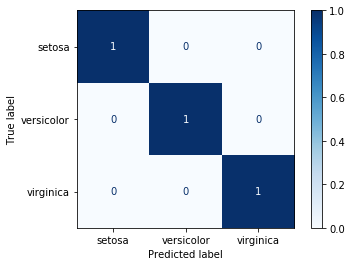


- RODADA 7 - Semente 5126 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.91666667 0.88888889] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.85      0.92      0.88        12
   virginica       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


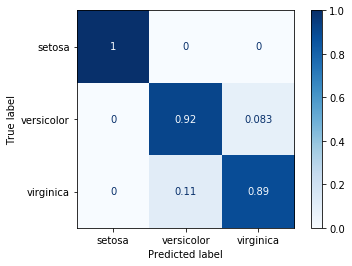


- RODADA 8 - Semente 6894 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.94117647 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.94      0.97        17
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


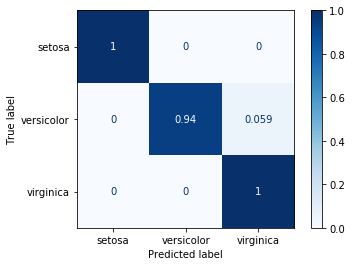


- RODADA 9 - Semente 2386 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.88888889 0.91666667] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.89      0.91        18
   virginica       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


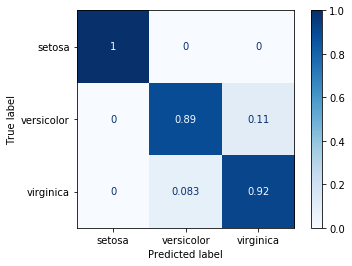


- RODADA 10 - Semente 6900 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.94444444 0.91666667] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


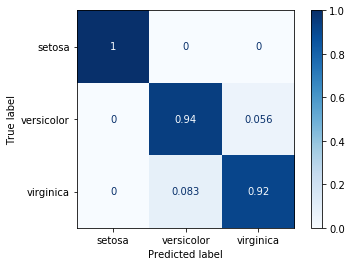


- RODADA 11 - Semente 2263 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.95238095 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.98        21
   virginica       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


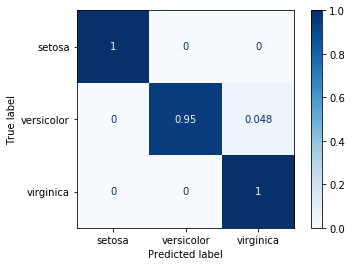


- RODADA 12 - Semente 6683 -

- Acurácia 0.9111111111111111 -
- Sensibilidade [1.         0.86666667 0.88888889] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.87      0.87      0.87        15
   virginica       0.89      0.89      0.89        18

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45

Matriz de confusão normalizada


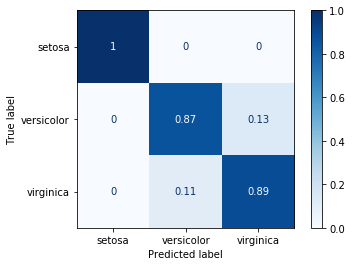


- RODADA 13 - Semente 7969 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.94736842 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.95      0.97        19
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


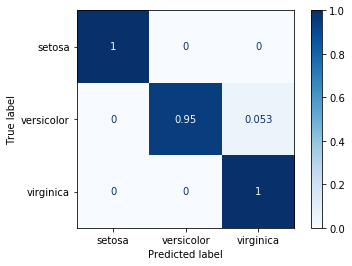


- RODADA 14 - Semente 1665 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.90909091 0.93333333] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.91      0.91      0.91        11
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


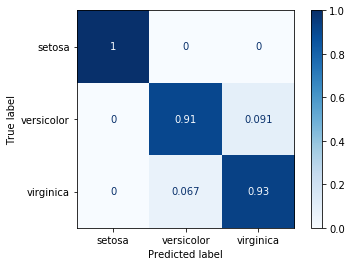


- RODADA 15 - Semente 7152 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.94736842] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


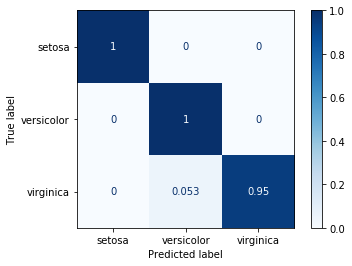


- RODADA 16 - Semente 5560 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         1.         0.85714286] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      1.00      0.95        18
   virginica       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


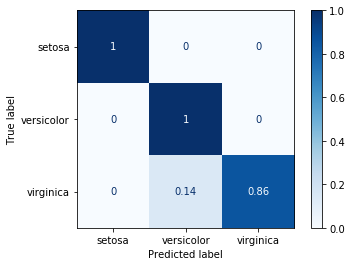


- RODADA 17 - Semente 4828 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.     0.9375 1.    ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.94      0.97        16
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


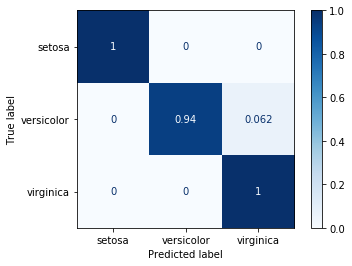


- RODADA 18 - Semente 4742 -

- Acurácia 0.9111111111111111 -
- Sensibilidade [1.   1.   0.75] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.69      1.00      0.82         9
   virginica       1.00      0.75      0.86        16

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.89        45
weighted avg       0.94      0.91      0.91        45

Matriz de confusão normalizada


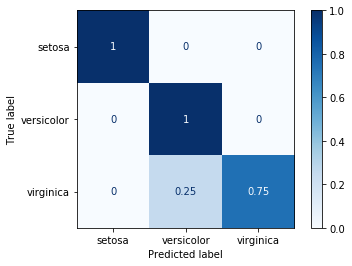


- RODADA 19 - Semente 4794 -

- Acurácia 0.9111111111111111 -
- Sensibilidade [1.         0.83333333 0.81818182] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.91        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.91      0.91      0.91        45

Matriz de confusão normalizada


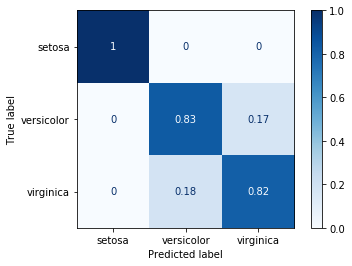


- RODADA 20 - Semente 4553 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.  1.  0.9] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


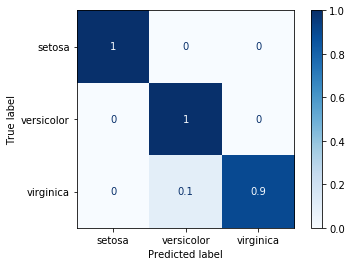


- RODADA 21 - Semente 1410 -

- Acurácia 0.9111111111111111 -
- Sensibilidade [1.         0.95       0.78571429] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      0.95      0.90        20
   virginica       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.92        45
weighted avg       0.91      0.91      0.91        45

Matriz de confusão normalizada


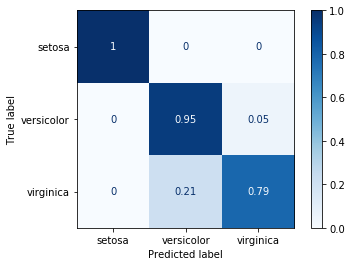


- RODADA 22 - Semente 5266 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.94117647 0.91666667] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


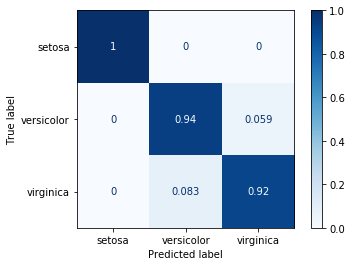


- RODADA 23 - Semente 6208 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.93333333] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


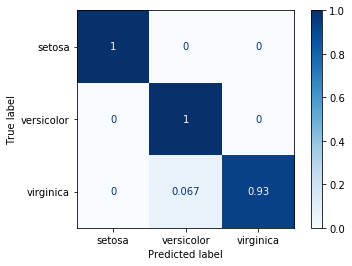


- RODADA 24 - Semente 7977 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         1.         0.94444444] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


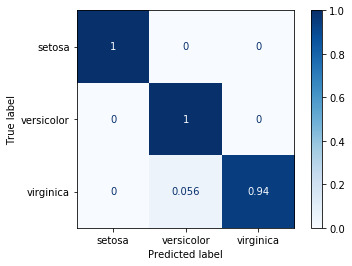


- RODADA 25 - Semente 6573 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.9375     0.92857143] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        16
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


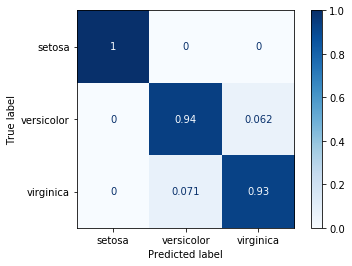


- RODADA 26 - Semente 2229 -

- Acurácia 0.8888888888888888 -
- Sensibilidade [1.         1.         0.76190476] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.71      1.00      0.83        12
   virginica       1.00      0.76      0.86        21

    accuracy                           0.89        45
   macro avg       0.90      0.92      0.90        45
weighted avg       0.92      0.89      0.89        45

Matriz de confusão normalizada


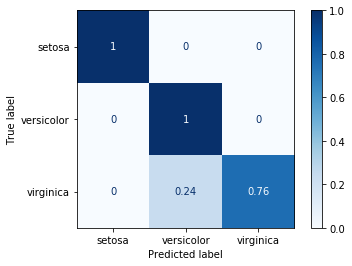


- RODADA 27 - Semente 456 -

- Acurácia 1.0 -
- Sensibilidade [1. 1. 1.] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusão normalizada


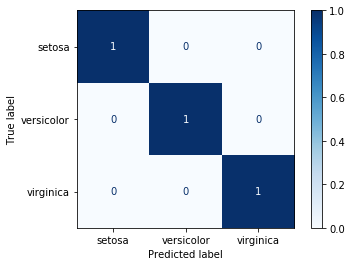


- RODADA 28 - Semente 7963 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.88235294 0.92857143] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.88      0.91        17
   virginica       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

Matriz de confusão normalizada


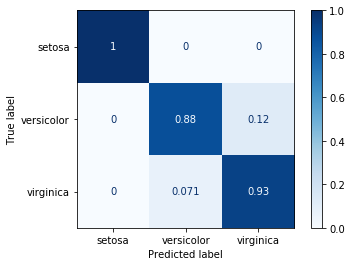


- RODADA 29 - Semente 4473 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.92857143 0.94117647] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.93      0.93        14
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


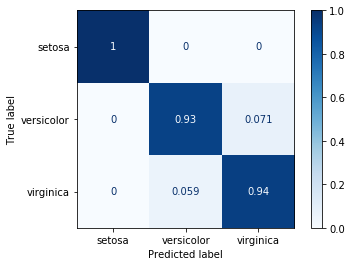

In [13]:
accuracy, recall, confusion = test_30_knn()

## Gerando _DataFrame_ de acurácia e sensibilidade

In [14]:
metricDF = pd.DataFrame(data=recall, columns=[f'S - {classe}' for classe in irisDset.target_names])
metricDF['Accuracy'] = accuracy
metricDF

,S - setosa,S - versicolor,S - virginica,Accuracy
0,1.0,1.000000,0.875000,0.955556
1,1.0,1.000000,1.000000,1.000000
2,1.0,1.000000,0.923077,0.977778
3,1.0,1.000000,0.928571,0.977778
4,1.0,1.000000,1.000000,1.000000
5,1.0,0.933333,0.666667,0.844444
6,1.0,1.000000,1.000000,1.000000
7,1.0,0.916667,0.888889,0.933333
8,1.0,0.941176,1.000000,0.977778
9,1.0,0.888889,0.916667,0.933333


In [15]:
metricDF.describe()

,S - setosa,S - versicolor,S - virginica,Accuracy
count,30.0,30.000000,30.000000,30.000000
mean,1.0,0.957015,0.911695,0.954074
std,0.0,0.047859,0.084349,0.036414
min,1.0,0.833333,0.666667,0.844444
25%,1.0,0.934375,0.888889,0.933333
50%,1.0,0.951190,0.928571,0.955556
75%,1.0,1.000000,0.986842,0.977778
max,1.0,1.000000,1.000000,1.000000


In [16]:
confusion

[array([[1.   , 0.   , 0.   ],
        [0.   , 1.   , 0.   ],
        [0.   , 0.125, 0.875]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.07692308, 0.92307692]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.07142857, 0.92857143]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 0.93333333, 0.06666667],
        [0.        , 0.33333333, 0.66666667]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 0.91666667, 0.08333333],
        [0.        , 0.11111111, 0.88888889]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 0.94117647, 0.05882353],
        [0.        , 0.        , 1.        ]]),
 